> (Última Actualización: 30 de Septiembre de 2025)

# **Introducción al modelado continuo** (*a.k.a.* **Ecuaciones de la física matemática**)
## Laboratorio numérico

Bienvenidos al laboratorio numérico de la materia *Introducción al modelado continuo*, también conocida como *Ecuaciones de la física matemática*. En este, vamos a ver métodos numéricos para resolver distintos tipos de problemas de manera general, y su relación y aplicación a problemas específicos de la materia, de manera tal de complementar los contenidos de la cursada teórico-práctica.

# Motivación de este colab
<!-- $$\require{amsmath}$$ -->

Recordemos que estamos estudiando **sistemas dinámicos**, con reglas representadas por **ecuaciones diferenciales ordinarias (ODEs)**.
En la clase pasada vimos la generalización de métodos numéricos a 2D. Esto es extrapolable a problemas con más dimensiones, en particular al caso 3D. En este Colab vamos a usar estas herramientas para extendernos a **sistemas 3D**, donde vemos que pueden aparecer soluciones muy distintas a las vistas hasta ahora. Puede aparecer el **caos**.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from mpl_toolkits.mplot3d import axes3d

## Lorenz

Sea el sistema de ecuaciones de Lorenz

$$
\dot{x} = \sigma (y - x) \\
\dot{y} = rx - y - xz \\
\dot{z} = xy - bz \\
$$

donde $\sigma, r, b > 0$ son parámetros.


### Ejercicio 1

1.1. Definir una función de Python con las ecuaciones del sistema considerando por default valores de los parámetros $\sigma$ = 10, r = 1, b = 8/3. Use el formato para las variables de entrada compatibles con `solve_ivp` para poder encontrar las soluciones usando esta función de Scipy a partir del método de integración de Runge-Kutta para valores iniciales.


In [2]:
def lorenz(t, v, sigma=10, r=1, b=8/3):
    x, y, z = v
    dx = sigma * (y - x)
    dy = r*x - y - x*z
    dz = x*y - b*z
    return [dx, dy, dz]


1.2. Encontrar las soluciones para $x$, $y$, y $z$ para distintos valores de r entre 0 y 1 (sin incluir los extremos) integrando hasta 100 con paso de 0.01, para valores iniciales [1,1,1]. Observar que hay un punto fijo en el origen.

In [3]:
t0 = 0
tf = 100
dt = 0.01

t = np.arange(t0, tf, dt)
vi = [1, 1, 1]
rs = [0.1, 0.5, 0.9]

for r in rs:
    sol = sp.integrate.solve_ivp(lorenz, [t[0], t[-1]], vi, t_eval=t, args=(r,))
    print(sol.y)

[[1.         0.99999505 0.99998037 ... 0.369252   0.36923536 0.36921873]
 [1.         0.99013231 0.98052524 ... 0.35261596 0.35260133 0.35258672]
 [1.         0.98350445 0.96734679 ... 0.04901414 0.04900915 0.04900418]]
[[1.         0.99997527 0.99990209 ... 0.19493241 0.19492312 0.19491384]
 [1.         0.99013231 0.98052523 ... 0.19307457 0.19306554 0.1930565 ]
 [1.         0.98350438 0.96734627 ... 0.01416753 0.01416612 0.01416469]]
[[1.         0.99995554 0.99982425 ... 0.16338801 0.16338022 0.16337243]
 [1.         0.99013231 0.98052523 ... 0.16252288 0.1625152  0.16250752]
 [1.         0.98350431 0.96734574 ... 0.00999726 0.00999624 0.0099952 ]]



1.3. Qué pasa para el caso r = 1.2? Qué puede decir respecto a los puntos fijos en base a lo hecho en el ejercicio 17b de la guía 1? Puede buscar el punto fijo usando `fsolve` (para esto es necesario definir una nueva función que sea el sistema de Lorenz pero sin la dependencia temporal y con los valores de parámetros correspondientes). Se parece al valor esperado $x^{*}=y^{*}=\pm\sqrt{b(r-1)}, z^{*}=r-1$?



In [4]:
# Defino sistema de Lorenz sin dependencia temporal y con r = 1.2
def lorenz_nt(v, sigma=10, r=1.2, b=8/3):
    return lorenz(0, v, sigma, r, b)

pf = sp.optimize.fsolve(lorenz_nt, vi)
pf

array([0.73029674, 0.73029674, 0.2       ])

In [5]:
r = 1.2
b = 8/3

pf_x = pf_y = np.sqrt(b * (r - 1))
pf_z = r - 1
pf_real = [pf_x, pf_y, pf_z]
pf_real


[np.float64(0.7302967433402214),
 np.float64(0.7302967433402214),
 0.19999999999999996]

1.4. Resolver para r = 28, guardar la solución en una variable que se llame `solucion_lorenz`. Graficar el diagrama de fases 3D. Observar también las evoluciones en el tiempo de las variables por separados con subplots de manera tal que la evolución de cada variable que graficada en una fila del subplot. Puede indicar que los subplots compartan el eje x.


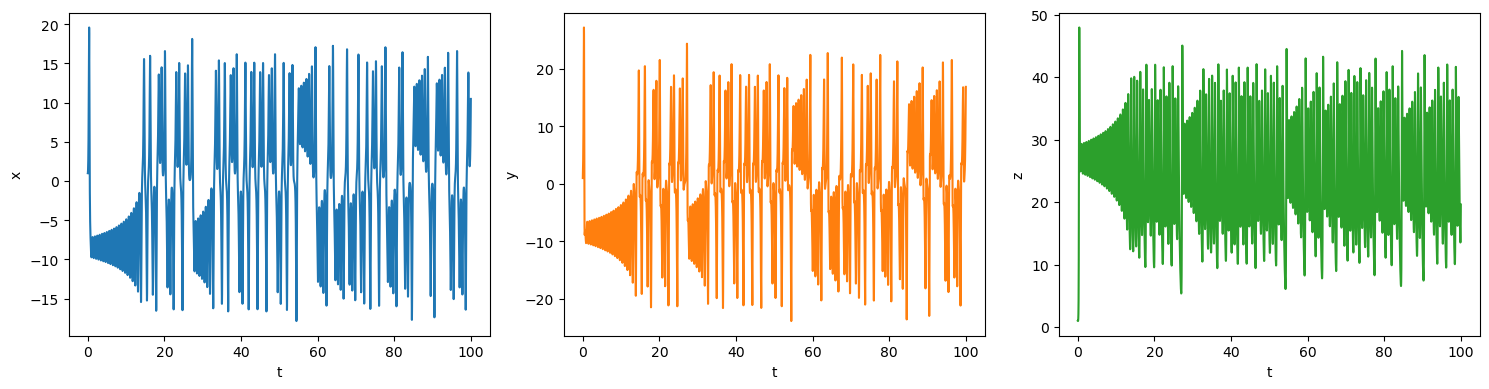

In [6]:
t0 = 0 
tf = 100
dt = 0.01
vi = [1, 1, 1]
sigma = 10
r = 28
b = 8/3

t = np.arange(t0, tf, dt)

solucion_lorenz = sp.integrate.solve_ivp(lorenz, [t[0], t[-1]], vi, t_eval=t, args=(sigma, r, b,))
x, y, z = solucion_lorenz.y

fig2, axs = plt.subplots(1, 3, figsize=(15, 4), sharex=True)

axs[0].plot(t, x, color='C0')
axs[0].set_xlabel('t')
axs[0].set_ylabel('x')

axs[1].plot(t, y, color='C1')
axs[1].set_xlabel('t')
axs[1].set_ylabel('y')

axs[2].plot(t, z, color='C2')
axs[2].set_xlabel('t')
axs[2].set_ylabel('z')

plt.tight_layout()
plt.show()


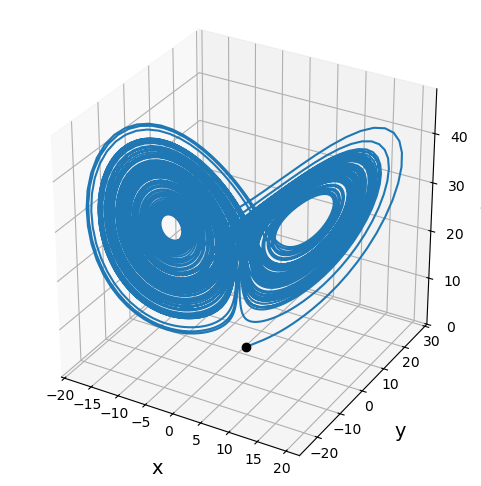

In [7]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.plot(x[0], y[0], z[0], 'ko')
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14)
ax.tick_params(axis='x', which='major', pad=-3)
ax.tick_params(axis='y', which='major', pad=-3)
#ax.view_init(elev=30, azim=60)
ax.set_box_aspect(aspect = (1,1,1))
plt.show()


1.5. Resolver el mismo problema que en 1.4., pero para nuevas condiciones iniciales que sean iguales a las anteriores sumando 0.0001. Guardar la solución en una variable que se llame `solucion_lorenz2`. Observar las evoluciones en el tiempo de las variables de estas soluciones. Cómo son respecto de las anteriores? Grafique por ejemplo las soluciones para la variable $x$ de ambos problemas en un mismo plot (use el argumento de entrada alpha=0.7 para agregar una transparencia a las curvas graficadas). Que observa de las evoluciones temporales?


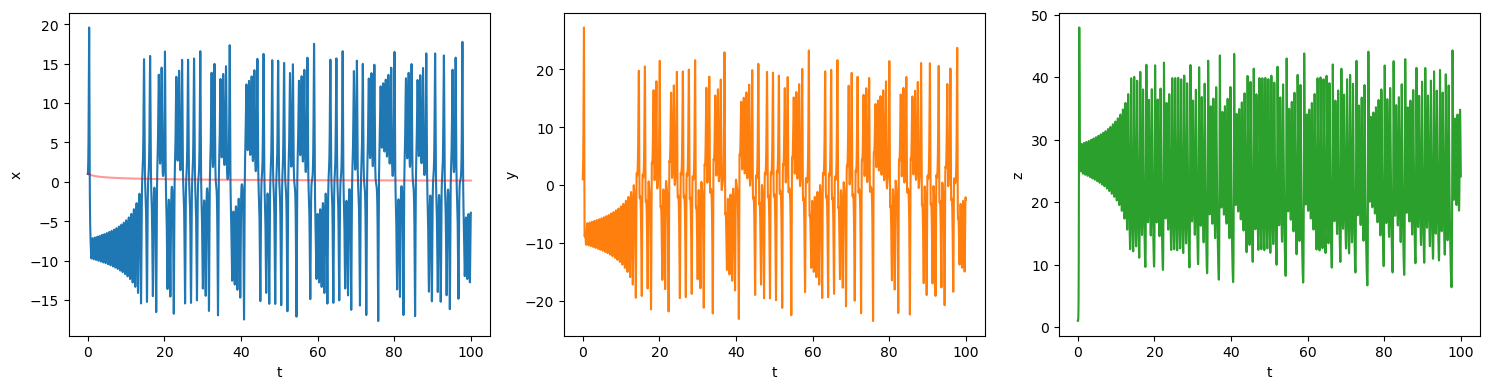

In [8]:
t0 = 0 
tf = 100
dt = 0.01
eps = 0.0001
vi = [1+eps, 1+eps, 1+eps]
sigma = 10
r = 28
b = 8/3

t = np.arange(t0, tf, dt)

solucion_lorenz2 = sp.integrate.solve_ivp(lorenz, [t[0], t[-1]], vi, t_eval=t, args=(sigma, r, b,))
x, y, z = solucion_lorenz2.y
x2, _, _ = sol.y

fig2, axs = plt.subplots(1, 3, figsize=(15, 4), sharex=True)

axs[0].plot(t, x, color='C0')
axs[0].plot(t, x2, alpha=0.4, color='red')
axs[0].set_xlabel('t')
axs[0].set_ylabel('x')

axs[1].plot(t, y, color='C1')
axs[1].set_xlabel('t')
axs[1].set_ylabel('y')

axs[2].plot(t, z, color='C2')
axs[2].set_xlabel('t')
axs[2].set_ylabel('z')

plt.tight_layout()
plt.show()

### Animación de la trayectoria

Ahora vamos a hacer una animación en la que un punto se mueva a lo largo de la trayectoria al tiempo que la va dibujando.

In [ ]:
!sudo apt install ffmpeg

[sudo] password for lmendez: 

In [ ]:
import matplotlib.animation as animation
# from IPython.display import HTML, display

dt = 0.01
t_max = 10
t_eval = np.arange(0, t_max, dt)
t_span = [t_eval[0], t_eval[-1]]
X0 = [1, 1, 1]
sigma = 10
r = 28
b = 8/3
solucion = sp.integrate.solve_ivp(lorenz, t_span, X0, t_eval=t_eval, args=(sigma, r, b))

# Extraer las soluciones
x = solucion.y[0]
y = solucion.y[1]
z = solucion.y[2]

# Crear la figura para la animación
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-30, 30])
ax.set_ylim([-30, 30])
ax.set_zlim([0, 50])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Inicializar la trayectoria y el punto actual
line, = ax.plot([], [], [], lw=2)
point, = ax.plot([], [], [], 'ro')  # Punto rojo para el punto actual

# Función para inicializar la animación
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

# Función para actualizar la animación
def update(num):
    line.set_data(x[:num], y[:num])
    line.set_3d_properties(z[:num])
    point.set_data([x[num]], [y[num]])  # Usa listas en lugar de valores individuales
    point.set_3d_properties([z[num]])   # Usa listas en lugar de valores individuales
    return line, point

# Crear la animación
ani = animation.FuncAnimation(fig, update, frames=len(t_eval), init_func=init, interval=30, blit=True)

# Guardar la animación como un archivo de video
ani.save('./content/lorenz_attractor_3D.mp4', writer='ffmpeg', fps=30)
plt.close(fig)  # Cierra la figura para evitar mostrarla nuevamente

In [ ]:

plt.close(fig)  # Cierra la figura para evitar mostrarla nuevamente
display(('<video width="800" height="600" controls><source src="/content/lorenz_attractor_3D.mp4" type="video/mp4"></video>'))

'<video width="800" height="600" controls><source src="/content/lorenz_attractor_3D.mp4" type="video/mp4"></video>'

In [ ]:
from IPython.display import Video
Video("./content/lorenz_attractor_3D.mp4", embed=True)

### Dinámica del sistema de Lorenz

El sistema de Lorenz fue propuesto por Edward Lorenz en 1963 como un modelo simplificado de la convección atmosférica. Pueden encontrar una explicación bastante detallada en el Strogatz. En particular, van a encontrar la demostración matemática de que el sistema de Lorenz es un sitema disipativo en el que el volumen en el espacio de fases se contrae exponencialmente rápido, lo que muestra que podemos tener puntos fijos estables, ciclos límites, o, para cierta configuración de parámetros el comportamiento acotado a una región del espacio en lo que se conoce como **atractor extraño**.

La rueda hidraulica (waterwheel) de Malkus se puede pensar como un sistema mecánico que expresa la dinámica de las ecuaciones de Lorenz

![Malkus](https://www.researchgate.net/publication/337557073/figure/fig1/AS:829668722761732@1574819846972/Water-wheel-model-with-different-rates-of-water-flow-Left-panel-low-rate-and-the-water.png)

El agua se vierte de manera constante desde la parte superior. Si la tasa de flujo es demasiado baja, las copas superiores nunca se llenan lo suficiente como para superar la fricción, por lo que la rueda permanece inmóvil. Con un flujo más rápido, la copa superior se vuelve lo suficientemente pesada como para hacer que la rueda comience a girar (parteizquierda de la figura). Eventualmente, la rueda se estabiliza en una rotación constante en una dirección u otra (parte central de la figura). Por simetría, la rotación en cualquiera de las dos direcciones es igualmente posible; el resultado depende de las condiciones iniciales.

Al aumentar aún más la tasa de flujo, podemos desestabilizar la rotación estable. Entonces el movimiento se vuelve **caótico**: la rueda gira en una dirección durante unas pocas vueltas, luego algunas de las copas se llenan demasiado y la rueda no tiene suficiente inercia para llevarlas por encima, por lo que la rueda se desacelera e incluso puede invertir su dirección (parte derecha de la figura). Luego gira en la otra dirección por un tiempo. La rueda sigue cambiando de dirección de manera errática. Esto lo hace muy sensible a variaciones en las condiciones iniciales. Por este motivo, y dadas las limitaciones de sampleo y de precisión en medición en datos reales, es que la capacidad de predicción del comportamiento de las variables es posible sólo a un corto tiempo, siendo imposible realizar predicciones a largo plazo, a pesar de que el sistema sea determinista y describa variables con un único futuro.

Es así que para ciertos valores de parámetros el sistema de Lorenz presenta un comportamiento particular: una estructura de doble espiral que no se repite, conocida como atractor de Lorenz. Incluso pequeñas variaciones en las condiciones iniciales conducen a trayectorias completamente diferentes, mostrando la sensibilidad a las condiciones iniciales. Esto es una característica de los **sistemas caóticos**.

---

## Rossler

Sea el sistema de ecuaciones de Rossler

$$
\dot{x} = - y - z \\
\dot{y} = x + ay \\
\dot{z} = b + xz - cz
$$

donde $a, b, c > 0$ son parámetros.

### Ejercicio 2

2.1. Definir una función de Python con las ecuaciones del sistema considerando por default valores de los parámetros a = b = 0.2, c = 14. Use el formato para las variables de entrada compatibles con `solve_ivp` para poder encontrar las soluciones usando esta función de Scipy a partir del método de integración de Runge-Kutta para valores iniciales.


In [ ]:
def rossler(t, v, a=0.2, b=0.2, c=14):
    x, y, z = v
    dx = - y - z
    dy = x + a*y
    dz = b + x*z - c*z
    return [dx, dy, dz]


2.2. Encontrar las soluciones para $x$, $y$, y $z$ para c=2.3 para valores iniciales [1,1,1]. Hallar y graficar un ciclo límite. Para ello, resolver el sistema para un tiempo relativamente largo y luego volver a resolver tomando como valor inicial el último punto de la trayectoria anterior (para la última solución no integre en tiempos tan largos). Guardar esta última solución en una variable que se llame `solucion_rossler`. Graficar el diagrama de fases 3D y el subplot con las 3 variables, una en cada fila. Observe la proyección en el plano $xy$.


In [ ]:
t0 = 0
tf = 100
a, b, c = [0.2, 0.2, 2.3]
vi = [1, 1, 1]

t = np.arange(t0, tf, 0.01)

solucion_rossler = sp.integrate.solve_ivp(rossler, [t0, tf], vi, t_eval=t, args=(a, b, c))
vi = [solucion_rossler.y[0][-1], solucion_rossler.y[1][-1], solucion_rossler.y[2][-1]]
solucion_rossler = sp.integrate.solve_ivp(rossler, [t0, tf], vi, t_eval=t, args=(a, b, c))
x, y, z = solucion_rossler.y


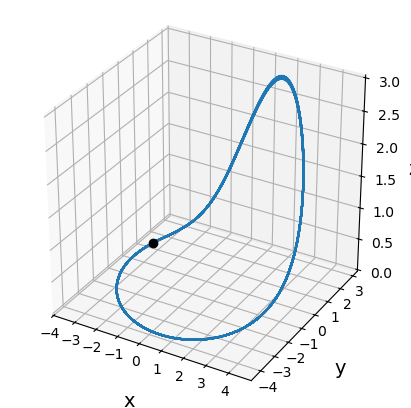

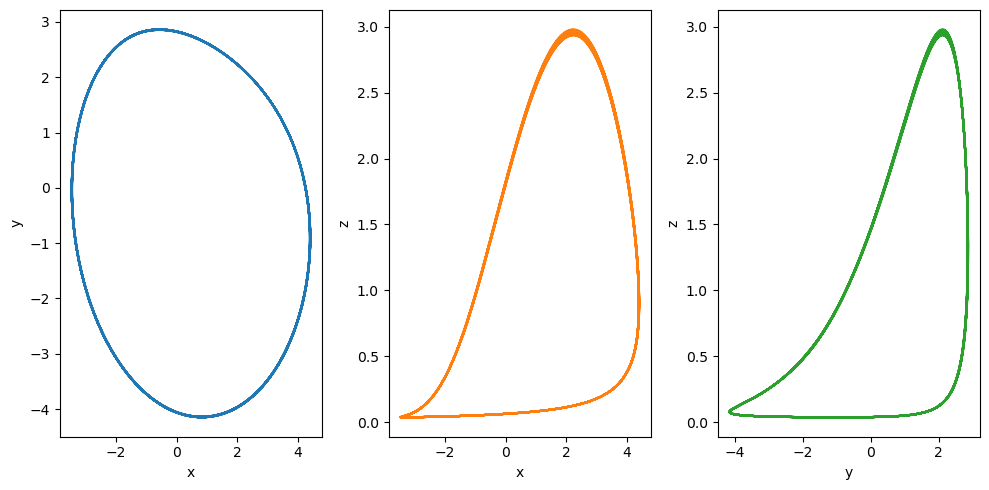

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.plot(x[0], y[0], z[0], 'ko')
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14)
ax.tick_params(axis='x', which='major', pad=-3)
ax.tick_params(axis='y', which='major', pad=-3)
#ax.view_init(elev=30, azim=60)
ax.set_box_aspect(aspect = (1,1,1))
plt.show()

fig3, axs3 = plt.subplots(1, 3, figsize=(10, 5))

axs3[0].plot(x, y, color='C0')
axs3[0].set_xlabel('x')
axs3[0].set_ylabel('y')

axs3[1].plot(x, z, color='C1')
axs3[1].set_xlabel('x')
axs3[1].set_ylabel('z')

axs3[2].plot(y, z, color='C2')
axs3[2].set_xlabel('y')
axs3[2].set_ylabel('z')

plt.tight_layout()
plt.show()


2.3. Repetir el procedimiento anterior para c = 3.3. Guardar esta solución en una variable que se llame `solucion_rossler2`. Graficar el diagrama de fases 3D y el subplot con las 3 variables, una en cada fila. Observe la proyección en el plano $xy$. Cómo es en este caso el ciclo límite respecto al anterior?


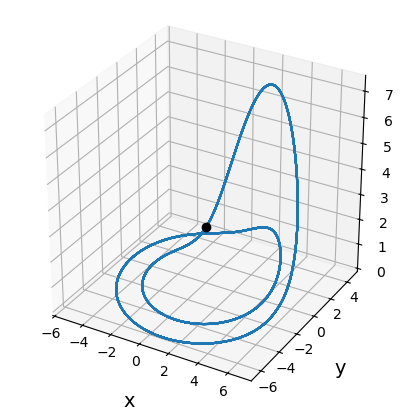

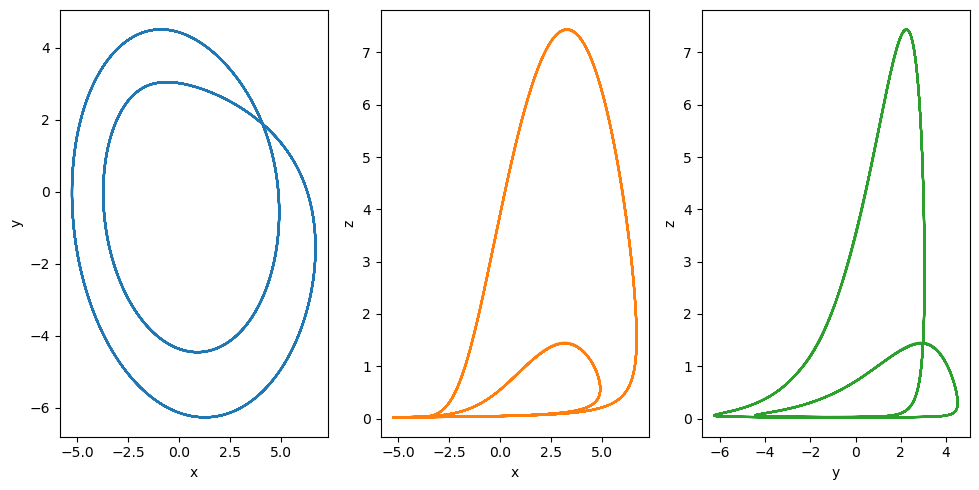

In [ ]:
t0 = 0
tf = 100
a, b, c = [0.2, 0.2, 3.3] # c = 3.3
vi = [1, 1, 1]

t = np.arange(t0, tf, 0.01)

solucion_rossler2 = sp.integrate.solve_ivp(rossler, [t0, tf], vi, t_eval=t, args=(a, b, c))
vi = [solucion_rossler2.y[0][-1], solucion_rossler2.y[1][-1], solucion_rossler2.y[2][-1]]
solucion_rossler2 = sp.integrate.solve_ivp(rossler, [t0, tf], vi, t_eval=t, args=(a, b, c))
x, y, z = solucion_rossler2.y

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.plot(x[0], y[0], z[0], 'ko')
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14)
ax.tick_params(axis='x', which='major', pad=-3)
ax.tick_params(axis='y', which='major', pad=-3)
#ax.view_init(elev=30, azim=60)
ax.set_box_aspect(aspect = (1,1,1))
plt.show()

fig3, axs3 = plt.subplots(1, 3, figsize=(10, 5))

axs3[0].plot(x, y, color='C0')
axs3[0].set_xlabel('x')
axs3[0].set_ylabel('y')

axs3[1].plot(x, z, color='C1')
axs3[1].set_xlabel('x')
axs3[1].set_ylabel('z')

axs3[2].plot(y, z, color='C2')
axs3[2].set_xlabel('y')
axs3[2].set_ylabel('z')

plt.tight_layout()
plt.show()


2.4. Usando la función `scipy.signal.find_peaks`, encuentre los picos para la variable $x$ en `solucion_rossler`. Esta función me va a devolver los elementos de la serie que son picos bajo algún criterio (ver documentación superficialmente). Haga el gráfico de esta variable con línea sólida negra y de sus picos con puntos rojos (para esto evalúe el tiempo y la variable sólo en los elementos obtenidos como picos). Calcule la distancia entre los tiempos en los que hay picos `numpy.diff`. Use la media de estas distancias como una forma de estimar el período (**por ahora**), y chequee que el desvío estándar sea bajo para que la media sea representativa. Hacer lo mismo para la variable $x$ de `solucion_rossler2`. Qué puede observar?


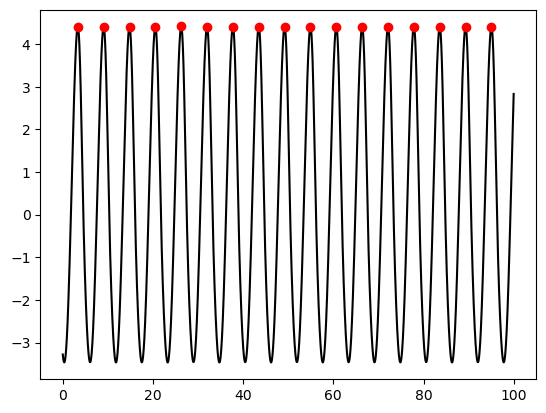

In [ ]:
x, _, _ = solucion_rossler.y
t = solucion_rossler.t
peaks_idx, _ = sp.signal.find_peaks(x)
plt.plot(t, x, color='black')
plt.plot(t[peaks_idx], x[peaks_idx], color='red', marker='o', linestyle='None')
plt.show()

In [ ]:
t_peaks = t[peaks_idx]
periodo = np.diff(t_peaks).mean()
periodo

np.float64(5.7325)

In [ ]:
x, _, _ = solucion_rossler2.y
t = solucion_rossler2.t
peaks_idx, _ = sp.signal.find_peaks(x)
t_peaks = t[peaks_idx]
periodo = np.diff(t_peaks).mean()
periodo

np.float64(5.765625)

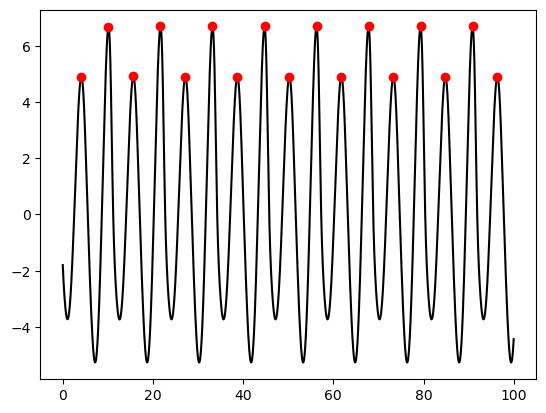

In [ ]:
plt.plot(t, x, color='black')
plt.plot(t[peaks_idx], x[peaks_idx], color='red', marker='o', linestyle='None')
plt.show()


2.5. Vuelva a calcular los picos de la variable $x$ de `solucion_rossler2` de la misma manera, pero usando como argumento de entrada `height=6` para la función `find_peaks`. Cómo es ahora el período estimado? Qué es lo que está pasando?


In [ ]:
x, _, _ = solucion_rossler2.y
t = solucion_rossler2.t
peaks_idx, _ = sp.signal.find_peaks(x, height=6)
t_peaks = t[peaks_idx]
periodo = np.diff(t_peaks).mean()
periodo

np.float64(11.531428571428572)

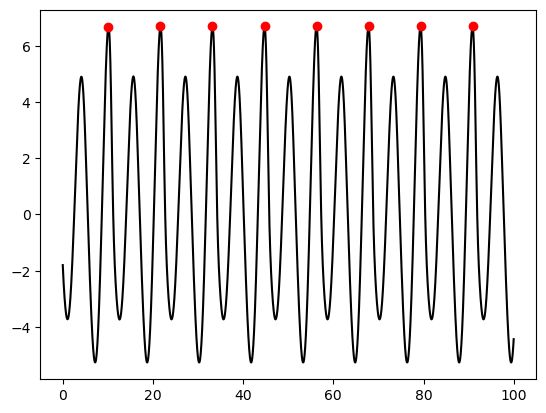

In [ ]:
plt.plot(t, x, color='black')
plt.plot(t[peaks_idx], x[peaks_idx], color='red', marker='o', linestyle='None')
plt.show()


2.6. Repetir el análisis de 2.3. para c = 6.3. ¿Se alcanza un ciclo límite en este caso?


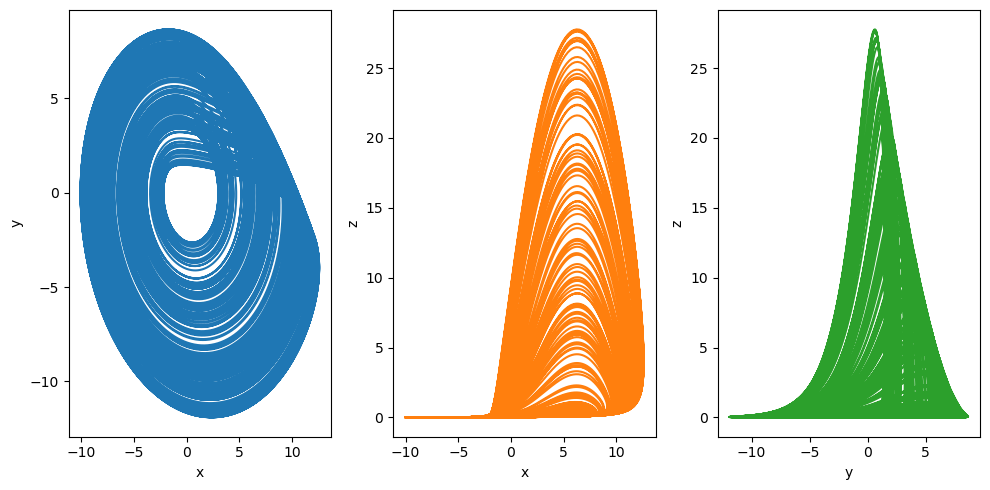

In [ ]:
t0 = 0
tf = 1000
a, b, c = [0.2, 0.2, 6.3] # c = 6.3
vi = [1, 1, 1]

t = np.arange(t0, tf, 0.01)

solucion_rossler3 = sp.integrate.solve_ivp(rossler, [t0, tf], vi, t_eval=t, args=(a, b, c))
vi = [solucion_rossler3.y[0][-1], solucion_rossler3.y[1][-1], solucion_rossler3.y[2][-1]]
solucion_rossler3 = sp.integrate.solve_ivp(rossler, [t0, tf], vi, t_eval=t, args=(a, b, c))
x, y, z = solucion_rossler3.y

fig3, axs3 = plt.subplots(1, 3, figsize=(10, 5))

axs3[0].plot(x, y, color='C0')
axs3[0].set_xlabel('x')
axs3[0].set_ylabel('y')

axs3[1].plot(x, z, color='C1')
axs3[1].set_xlabel('x')
axs3[1].set_ylabel('z')

axs3[2].plot(y, z, color='C2')
axs3[2].set_xlabel('y')
axs3[2].set_ylabel('z')

plt.tight_layout()
plt.show()


2.7. Vuelva a resolver el problema para c = 6.3 con condiciones iniciales [1,1,1] pero para tiempos no tan largos y guarde la solucion en `solucion_rossler3`. Resolver de manera análoga para valores iniciales [1.01,1,1] y guardar en la variable `solucion_rossler4`.
Comparar (por separado) las componentes $x$, $y$ y $z$ de esta solución perturbada con la solución anterior.




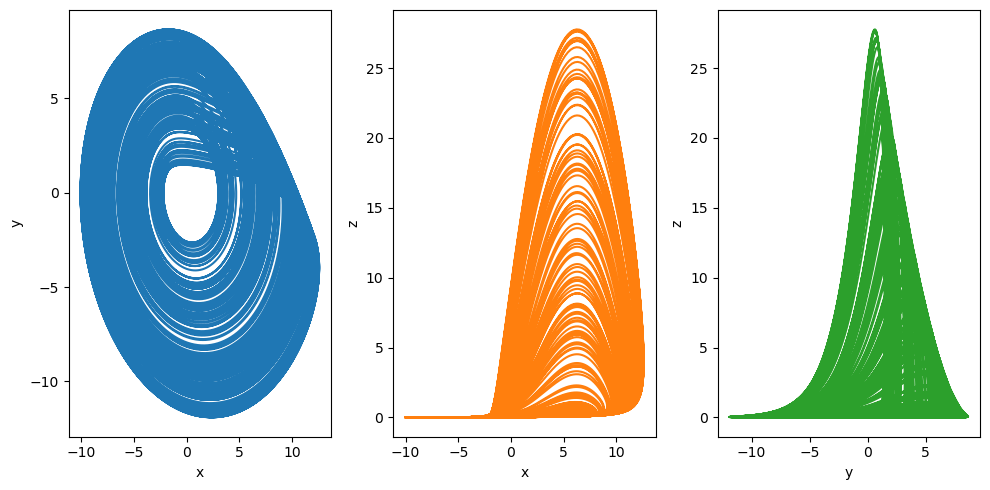

In [ ]:
t0 = 0
tf = 1000
a, b, c = [0.2, 0.2, 6.3] # c = 6.3
vi = [1, 1, 1]

t = np.arange(t0, tf, 0.01)

solucion_rossler3 = sp.integrate.solve_ivp(rossler, [t0, tf], vi, t_eval=t, args=(a, b, c))
vi = [solucion_rossler3.y[0][-1], solucion_rossler3.y[1][-1], solucion_rossler3.y[2][-1]]
solucion_rossler3 = sp.integrate.solve_ivp(rossler, [t0, tf], vi, t_eval=t, args=(a, b, c))
x, y, z = solucion_rossler3.y

fig3, axs3 = plt.subplots(1, 3, figsize=(10, 5))

axs3[0].plot(x, y, color='C0')
axs3[0].set_xlabel('x')
axs3[0].set_ylabel('y')

axs3[1].plot(x, z, color='C1')
axs3[1].set_xlabel('x')
axs3[1].set_ylabel('z')

axs3[2].plot(y, z, color='C2')
axs3[2].set_xlabel('y')
axs3[2].set_ylabel('z')

plt.tight_layout()
plt.show()

---
# Mapas discretos

Los mapas discretos son una herramienta utilizada en el estudio de sistemas dinámicos. Consiste en considerar la evolución del tiempo en pasos discretos en lugar de ser continuo como en las ecuaciones diferenciales. Estos mapas son utilizados para modelar fenómenos en los que los cambios ocurren en intervalos regulares o discretos, como poblaciones animales año a año, secuencias iterativas, y procesos en los que la evolución a lo largo del tiempo se expresa mediante relaciones algebraicas en lugar de diferenciales.

Un mapa discreto toma una variable inicial y aplica una regla (función) iterativamente para generar una secuencia de valores (ejemplo de la calculadora!). Uno de los ejemplos más famosos y estudiados es el mapa logístico, que es un modelo no lineal muy simple pero increíblemente rico en comportamiento.

**Este tema se dió en la clase teórica, pero no hay ejercicios en la guía y no forma parte del parcial. Entonces vamos a mostrar algún ejemplo, pero sin profundizar mucho.**

## Mapa Logístico

El mapa logístico describe cómo cambia una población a lo largo del tiempo bajo condiciones de crecimiento limitado. La ecuación es:

$$
x_{n+1} = r x_n (1 - x_n)
$$

Donde:
- $x_n$ es la fracción de la capacidad máxima de la población en el año $n$.
- $r$ es una tasa de crecimiento que controla la dinámica del sistema.

Dependiendo del valor de $r$, el comportamiento del sistema puede ser muy diferente:

- Para 0 < r < 1: La población se extingue, y todos los valores $x_n$ tienden a 0.
- Para 1 < r < 3: El sistema converge a un valor fijo no nulo. En esta región, \(x_n\) se estabiliza en un punto fijo.
- Para 3 < r < 3.57: Aparece el fenómeno de **bifurcación**. En lugar de un valor fijo, el sistema comienza a oscilar entre dos valores, luego cuatro, luego ocho, y así sucesivamente. Este comportamiento se conoce como un **duplicación de período**.
- Para r $\approx$ 3.57: El sistema entra en un régimen caótico. Pequeñas variaciones en el valor inicial $x_0$ pueden producir trayectorias completamente diferentes. Sin embargo, dentro del caos, hay "ventanas" periódicas.
- Para r > 4: La dinámica es inestable y diverge fuera del intervalo [0, 1], ya que los valores de $x_n$ pueden volverse negativos o mayores a 1.

El mapa logístico es un ejemplo paradigmático del **caos**, donde el comportamiento del sistema es extremadamente sensible a las condiciones iniciales. El caos en sistemas discretos es importante porque permite estudiar cómo un sistema aparentemente simple puede mostrar comportamiento impredecible a largo plazo.

El diagrama de bifurcaciones es una forma de visualizar cómo cambia el comportamiento del mapa logístico a medida que variamos el parámetro $r$. Para cada valor de $r$, se observa el valor de $x_n$ después de muchas iteraciones. Si el sistema tiene un punto fijo, se verá una única línea. Si oscila entre dos valores, aparecerán dos puntos, y así sucesivamente. Cuando el sistema es caótico, los puntos aparecen de manera desordenada dentro de un intervalo.


In [ ]:
# Parámetros iniciales
r = 3.5  # Tasa de crecimiento
x0 = 0.5  # Valor inicial de la población
iteraciones = 100  # Número de iteraciones

# Función del mapa logístico
def logistic_map(r, x):
    return r * x * (1 - x)

# Generamos las iteraciones
x = np.zeros(iteraciones)
x[0] = x0

for i in range(1, iteraciones):
    x[i] = logistic_map(r, x[i-1])

# Graficamos la evolución temporal del mapa logístico
plt.figure(figsize=(10, 3))
plt.plot(range(iteraciones), x, 'k-', lw=1)
plt.xlabel('Iteraciones', fontsize=14)
plt.ylabel('x', fontsize=14)
plt.show()

In [ ]:
# Parámetros para el diagrama de bifurcación
r_min = 2.5
r_max = 4.0
n_points_r = 10000  # Número de puntos en el eje r
iterations = 1000
last = 100  # Iteraciones que se van a graficar

# Valores de r
r_values = np.linspace(r_min, r_max, n_points_r)

# Valores iniciales
x0 = 0.5

# Preparamos la gráfica
plt.figure(figsize=(10, 6))

# Iteramos sobre los valores de r
for r in r_values:
    x = x0
    # Iteramos para permitir que el sistema alcance su estado asintótico
    for i in range(iterations - last):
        x = logistic_map(r, x)
    # Guardamos las últimas iteraciones
    x_vals = []
    for i in range(last):
        x = logistic_map(r, x)
        x_vals.append(x)
    # Graficamos las últimas iteraciones
    plt.plot([r] * last, x_vals, ',k', alpha=0.25)

plt.xlabel('r', fontsize=14)
plt.ylabel('x', fontsize=14)
plt.show()

## Mapa de Lorenz



El mapa de Lorenz se construye con la secuencia discreta de los máximos de la variable $z$.

In [ ]:
picos, _ = sp.signal.find_peaks(solucion_lorenz.y[2])

plt.figure(figsize=(12, 3))
plt.plot(solucion_lorenz.t, solucion_lorenz.y[2], 'k')
plt.plot(solucion_lorenz.t[picos], solucion_lorenz.y[2][picos], 'ro')
plt.ylabel('z', fontsize=14)
plt.xlabel('t', fontsize=14)
plt.show()

In [ ]:
# Construir los pares z_n y z_{n+1}
z_n = solucion_lorenz.y[2][picos][:-1]
z_n1 = solucion_lorenz.y[2][picos][1:]

# Graficar z_{n+1} vs z_n
plt.figure(figsize=(5, 5))
plt.plot(np.linspace(z_n.min(), z_n.max(), 20), np.linspace(z_n.min(), z_n.max(), 20), 'gray', lw=0.75, alpha=0.7)
plt.scatter(z_n, z_n1, s=1, color='k')
plt.xlabel('$z_n$', fontsize=14)
plt.ylabel('$z_{n+1}$', fontsize=14)
plt.show()

El mapa muestra varias cosas para destacar sobre el atractor de Lorenz. Por un lado, que como el modulo de la derivada de la función que describe los $z_{n+1}$ en términos de $z_n$ es mayor a 1, lo que indica que no puede haber un ciclo límite estable que explique el confinamiento espacial de las trayectorias. Por otro lado, se observa un máximo que refleja que la altura de los picos en z va aumentando hasta alcanzar su máximo, lo cual observando el sistema y sus trayectorias sucede justo antes de cambiar de "oreja" del atractor.

## Duplicación de período en Rossler

Usando el mapa de Lorenz para el sistema de Rossler podemos encontrar el digrama de bifurcaciones, que incluye duplicación de período.

In [ ]:
dt = 0.01
t_max = 1000
t_eval = np.arange(0, t_max, dt)
t_span = [t_eval[0], t_eval[-1]]
X0 = [1, 1, 1]
a = 0.2
b = 0.2
c = 5
sol = sp.integrate.solve_ivp(rossler, t_span, X0, t_eval=t_eval, args=(a, b, c))

picos, _ = sp.signal.find_peaks(sol.y[0])

plt.figure(figsize=(12, 3))
plt.plot(sol.t, sol.y[0], 'k')
plt.plot(sol.t[picos], sol.y[0][picos], 'ro')
plt.ylabel('x', fontsize=14)
plt.xlabel('t', fontsize=14)
plt.show()

In [ ]:
# Construir los pares z_n y z_{n+1}
x_n = sol.y[0][picos][:-1]
x_n1 = sol.y[0][picos][1:]

# Graficar z_{n+1} vs z_n
plt.figure(figsize=(5, 5))
plt.plot(np.linspace(x_n.min(), x_n.max(), 20), np.linspace(x_n.min(), x_n.max(), 20), 'gray', lw=0.75, alpha=0.7)
plt.scatter(x_n, x_n1, s=1, color='k')
plt.xlabel('$x_n$', fontsize=14)
plt.ylabel('$x_{n+1}$', fontsize=14)
plt.show()

In [ ]:
# Parámetros para el diagrama de bifurcación
c_min = 2.5
c_max = 6.0
n_points_c = 100
c_values = np.linspace(c_min, c_max, n_points_c)

dt = 0.01
t_max = 1000
t_eval = np.arange(0, t_max, dt)
t_span = [t_eval[0], t_eval[-1]]
X0 = [1, 1, 1]
a = 0.2
b = 0.2

plt.figure(figsize=(10, 6))
for c in c_values:
    sol = sp.integrate.solve_ivp(rossler, t_span, X0, t_eval=t_eval, args=(a, b, c))
    picos, _ = sp.signal.find_peaks(sol.y[0])
    plt.plot([c] * len(picos), sol.y[0][picos], ',k', alpha=0.25)

plt.xlabel('$c$', fontsize=14)
plt.ylabel('$x_max$', fontsize=14)
plt.show()